In [2]:
import warnings
from decimal import Decimal
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")

In [45]:
df=pd.read_csv(r'/content/processed_kidney.csv')

In [6]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,...,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,...,47.0,6700.0,4.9,0,0,0,0,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,...,54.0,7800.0,6.2,0,0,0,0,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,...,49.0,6600.0,5.4,0,0,0,0,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,...,51.0,7200.0,5.9,0,0,0,0,0,0,0


In [46]:
# Separating the dependent and independent variables
y = df['classification']
X = df.drop(['classification','id'], axis = 1)
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,9.6,31.0,7500.0,4.8,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


Feature Selection using Extra Tree Classifier

In [8]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(X, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
										extra_tree_forest.estimators_],
										axis = 0)


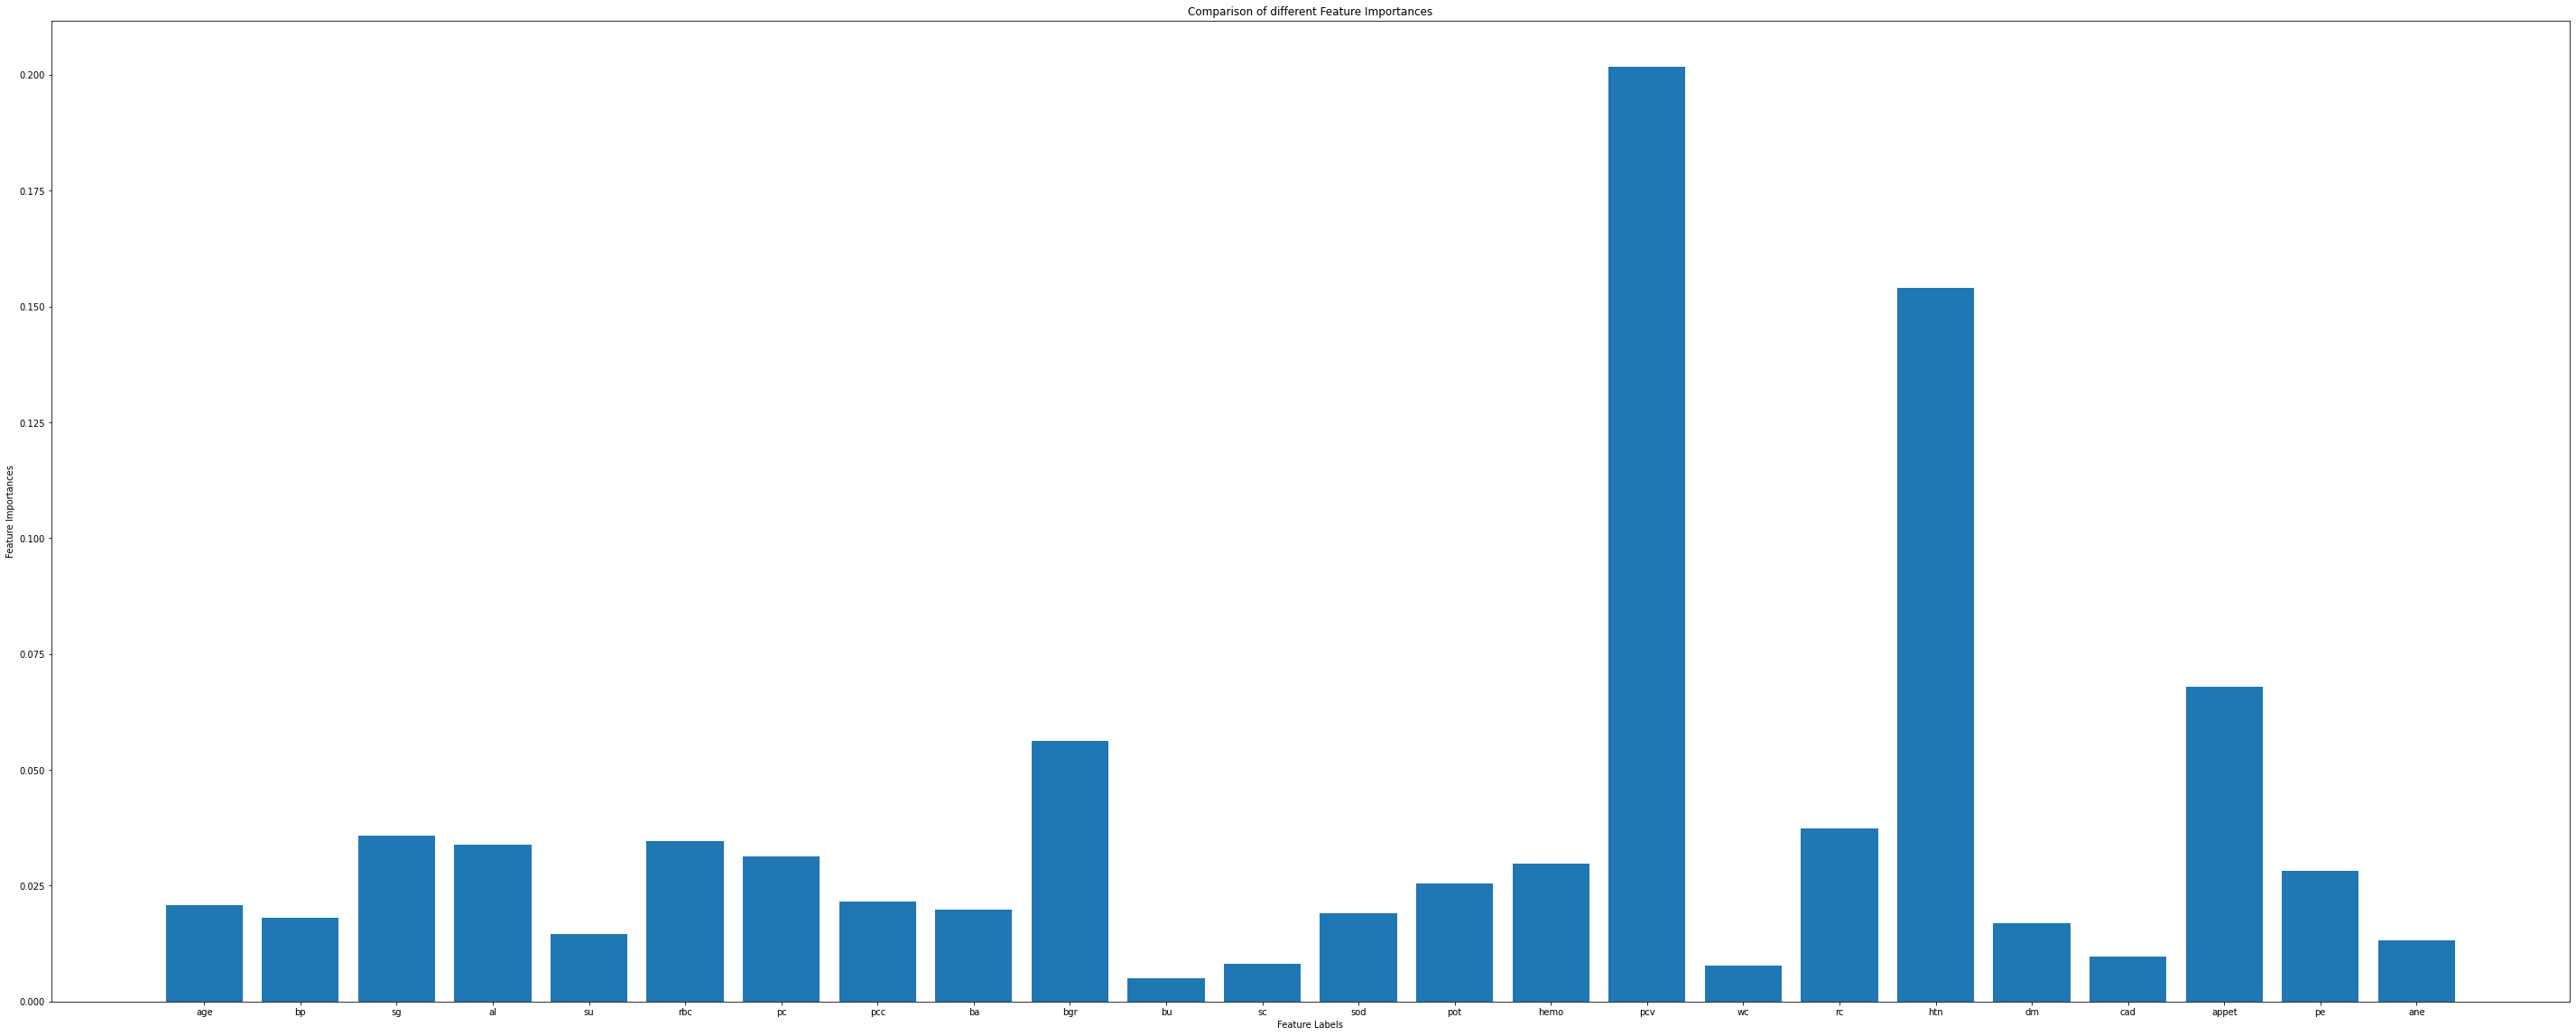

In [9]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize=(50,20))
plt.bar(X.columns, feature_importance_normalized)

plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

Identifying top 10 features for pre-diagnosis test

Index(['htn', 'pcv', 'sg', 'dm', 'appet', 'rbc', 'rc', 'bgr', 'al', 'bp'], dtype='object')


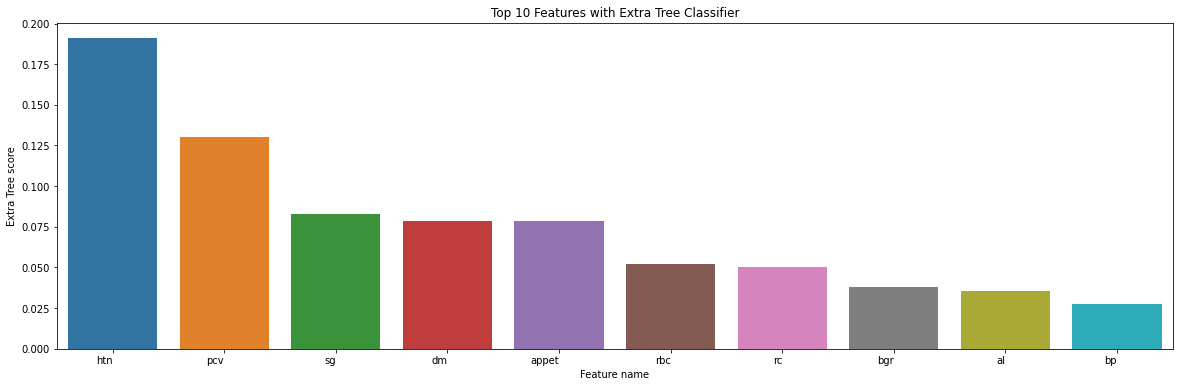

In [10]:
feature_scores=pd.DataFrame(extra_tree_forest.feature_importances_,columns=['Score'],index=X.columns).sort_values(by='Score',ascending=False)
top10_feature = feature_scores.nlargest(n=10, columns=['Score'])
plt.figure(figsize=(20,6))
print(top10_feature.index)
g = sns.barplot(x=top10_feature.index, y=top10_feature['Score'])
p = plt.title('Top 10 Features with Extra Tree Classifier')
p = plt.xlabel('Feature name')
p = plt.ylabel('Extra Tree score')
p = g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right')

In [11]:
top10_feature.index

Index(['htn', 'pcv', 'sg', 'dm', 'appet', 'rbc', 'rc', 'bgr', 'al', 'bp'], dtype='object')

In [12]:
X.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [58]:
#X.columns
for ele in X.columns:
  if ele not in top10_feature.index:
    X = X.drop(ele, axis = 1)

In [14]:
X.head()

,bp,sg,al,rbc,bgr,pcv,rc,htn,dm,appet
0,80.0,1.020,1.0,0,121.0,44.0,5.2,1,1,0
1,50.0,1.020,4.0,0,121.0,38.0,4.8,0,0,0
2,80.0,1.010,2.0,0,423.0,31.0,4.8,0,1,1
3,70.0,1.005,4.0,0,117.0,32.0,3.9,1,0,1
4,80.0,1.010,2.0,0,106.0,35.0,4.6,0,0,0


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = None)

Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier
gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 96.66666666666667 

Confusion Matrix :- 
[[43  4]
 [ 0 73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.95      1.00      0.97        73

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



Stochastic Gradient Boosting (SGB)

In [68]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))*100}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 100.0
Test Accuracy of Stochastic Gradient Boosting is 96.66666666666667 

Confusion Matrix :- 
[[43  4]
 [ 0 73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.95      1.00      0.97        73

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



**Extra Tree Classifier**

In [69]:
# accuracy score, confusion matrix and classification report of extra tree classifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))*100}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 100.0
Test Accuracy of Extra Trees Classifier is 99.16666666666667 

Confusion Matrix :- 
[[47  0]
 [ 1 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.99      0.99        73

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



**KNN**

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))*100}")
print(f"Test Accuracy of KNN is {knn_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 94.64285714285714
Test Accuracy of KNN is 91.66666666666666 

Confusion Matrix :- 
[[46  1]
 [ 9 64]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.98      0.90        47
           1       0.98      0.88      0.93        73

    accuracy                           0.92       120
   macro avg       0.91      0.93      0.91       120
weighted avg       0.93      0.92      0.92       120



**Decision Tree Classifier**

In [72]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))*100}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")


Training Accuracy of Decision Tree Classifier is 100.0
Test Accuracy of Decision Tree Classifier is 95.0 

Confusion Matrix :- 
[[43  4]
 [ 2 71]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       0.95      0.97      0.96        73

    accuracy                           0.95       120
   macro avg       0.95      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



In [78]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_features='auto',
                                              splitter='random'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [80]:
# best estimator
dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))*100}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 96.78571428571429
Test Accuracy of Decision Tree Classifier is 97.5 

Confusion Matrix :- 
[[47  0]
 [ 3 70]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.96      0.98        73

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



**Random Forest Classifier**

In [74]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))*100}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 99.28571428571429
Test Accuracy of Random Forest Classifier is 96.66666666666667 

Confusion Matrix :- 
[[43  4]
 [ 0 73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.95      1.00      0.97        73

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



ADA Boost Classifier

In [75]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))*100}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 100.0
Test Accuracy of Ada Boost Classifier is 97.5 

Confusion Matrix :- 
[[45  2]
 [ 1 72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        73

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



XGBoost

In [76]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))*100}")
print(f"Test Accuracy of XgBoost is {xgb_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 100.0
Test Accuracy of XgBoost is 96.66666666666667 

Confusion Matrix :- 
[[43  4]
 [ 0 73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.95      1.00      0.97        73

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



**Cat Boost Classifier**

In [81]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.4932968	total: 588us	remaining: 5.3ms
1:	learn: 0.3644826	total: 1.26ms	remaining: 5.06ms
2:	learn: 0.2857923	total: 1.83ms	remaining: 4.28ms
3:	learn: 0.2307019	total: 2.33ms	remaining: 3.49ms
4:	learn: 0.2029439	total: 3.31ms	remaining: 3.31ms
5:	learn: 0.1763112	total: 4.02ms	remaining: 2.68ms
6:	learn: 0.1453267	total: 4.3ms	remaining: 1.84ms
7:	learn: 0.1289168	total: 4.74ms	remaining: 1.19ms
8:	learn: 0.1144828	total: 5.21ms	remaining: 579us
9:	learn: 0.1033542	total: 5.68ms	remaining: 0us


In [82]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))*100}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc*100} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 98.92857142857143
Test Accuracy of Cat Boost Classifier is 96.66666666666667 

Confusion Matrix :- 
[[43  4]
 [ 0 73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.95      1.00      0.97        73

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



**LGBM Classifier**

In [83]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))*100}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc*100} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 100.0
Test Accuracy of LGBM Classifier is 96.66666666666667 

[[43  4]
 [ 0 73]]

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.95      1.00      0.97        73

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



**Models Comparison**

In [86]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','ADA Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XGBoost', 'Cat Boost', 'Extra Tree Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
8,Extra Tree Classifier,0.991667
1,Decision Tree Classifier,0.975000
3,ADA Boost Classifier,0.975000
2,Random Forest Classifier,0.966667
4,Gradient Boosting Classifier,0.966667
5,Stochastic Gradient Boosting,0.966667
6,XGBoost,0.966667
7,Cat Boost,0.966667
0,KNN,0.916667


In [87]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')